1
10
100
1000
10000
100000


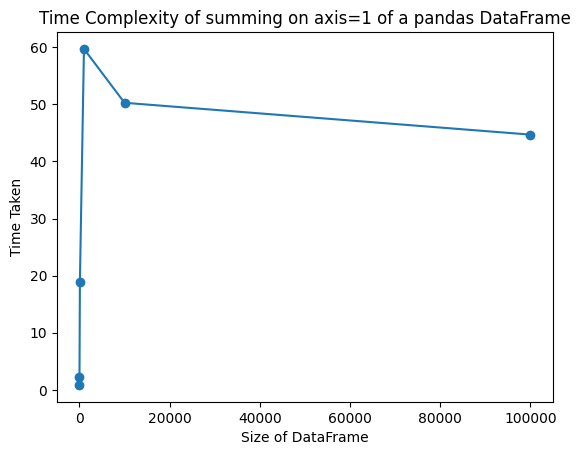

In [2]:
import pandas as pd
import numpy as np
import timeit

from scipy.stats import spearmanr

def method(rows=1000,cols=365, samples=4):
    u_df = pd.DataFrame(np.random.randint(0,10,size=(rows, cols)))
    o_df = pd.DataFrame(np.random.randint(0,10,size=(rows, cols)))
    f_df = pd.DataFrame(np.random.uniform(0,10,size=(rows, cols)))
    def body_b():
      u_df.sum(axis=1)
      o_df.sum(axis=1)
      cs = f_df.cumsum(axis=1)
      fst = cs.ne(0).idxmax(axis=1).astype(int) - 1
      lst = cs.idxmax(axis=1).astype(int) - 1
    def body_a():
      f_df.apply(lambda row: spearmanr(row.index, row)[0], axis=1)
    return timeit.timeit(body_a, number=samples) / timeit.timeit(body_b, number=samples)

sizes = np.logspace(0, 5, 6).astype(int)
#sizes = np.linspace(1, 10000, 6).astype(int)
times = []

for size in sizes:
    print(size)
    time_taken = method(size, 365)
    times.append(time_taken)

import matplotlib.pyplot as plt

plt.plot(sizes, times, marker='o')
plt.xlabel('Size of DataFrame')
plt.ylabel('Time Taken')
plt.title('Time Complexity of summing on axis=1 of a pandas DataFrame')
plt.show()